In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np

from process_results.results_utils import DATASETS, DEFAULT_METRIC, to_dataframe, plot_repeats, f, make_plots

def plot_heatmap(df):
    df["score_str"] =  df.best_metric.map(lambda x: f"{x*100:.1f}\n") + df.last3_mean.map(lambda x: f"{x*100:.1f}") + df.last3_std.map(lambda x: f" ± {x*100:.1f}")
    sns.heatmap(df.pivot("lr","batch_size","best_metric"), annot=df.pivot("lr","batch_size","score_str"),fmt="")
    plt.show()

def logfile_paths(dataset):
    return glob.glob(f"../../checkpoints/kd_finetune/{dataset}/**/long_pretrain/prediction/log",recursive=True)

/local/scratch-3/fwe21/miniconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
for dataset in ["CoLA","RTE"]:
    print(dataset)
    #for logfile in glob.glob(f"../../checkpoints/kd_finetune/{dataset}/**/long_pretrain/prediction/log",recursive=True):
    for logfile in glob.glob(f"../../checkpoints/kd_finetune/{dataset}/**/pretrained_*/prediction/log",recursive=True) + \
    glob.glob(f"../../checkpoints/kd_finetune/{dataset}/**/huggingface/prediction/log",recursive=True):
        df = to_dataframe(logfile, metric=DEFAULT_METRIC[dataset])
        if len(df["best_metric"])>0:
            all_scores = sum(df["epoch_metrics"],[])
            print(f(np.max(all_scores)),f(np.mean(all_scores))+"±"+f(np.std(all_scores)))
            #make_plots(logfile, metric=DEFAULT_METRIC[dataset])
        else:
            print("Warning", len(df))

CoLA
37.7 36.3±1.0
41.1 37.7±1.9
40.5 36.6±2.0
33.1 31.0±1.7
40.4 38.3±1.5
RTE
59.9 57.3±1.2
65.7 63.8±0.9
66.1 63.9±1.6
65.3 62.2±1.3
65.3 63.8±1.2


In [2]:
from process_results.results_utils import plot_repeats
for dataset in DATASETS:
    plot_repeats(
        dataset,
        f"../../checkpoints/kd_finetune/{dataset}/tinybert/long_pretrain/prediction/log",
        f"../../checkpoints/kd_finetune/{dataset}/tinybert/long_pretrain/prediction/log_rp"
    )

QNLI
[0.8887058392824455]
88.9 (88.9{\footnotesize±0.0)}
RTE
[0.6714801444043321, 0.6678700361010831, 0.631768953068592, 0.6389891696750902]
67.1 (65.3{\footnotesize±1.7)}
SST-2
[0.9162844036697247, 0.9139908256880734, 0.9151376146788991, 0.9162844036697247]
91.6 (91.5{\footnotesize±0.1)}
MRPC
[0.8719636797904968, 0.8650159239768982, 0.8643137216567993, 0.8620154857635498]
87.2 (86.6{\footnotesize±0.4)}
MNLI
[0.8128374936321956]
81.3 (81.3{\footnotesize±0.0)}
QQP
[0.8474937081336975]
84.7 (84.7{\footnotesize±0.0)}
CoLA
[0.40765342116355896, 0.4136162996292114, 0.42173507809638977, 0.4162446856498718, 0.4189835786819458]
42.2 (41.6{\footnotesize±0.5)}


SST-2


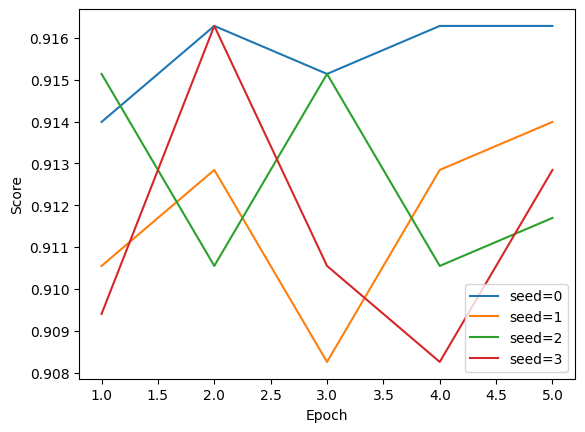

[0.9162844036697247, 0.9139908256880734, 0.9151376146788991, 0.9162844036697247]
91.6 (91.5{\footnotesize±0.1)}


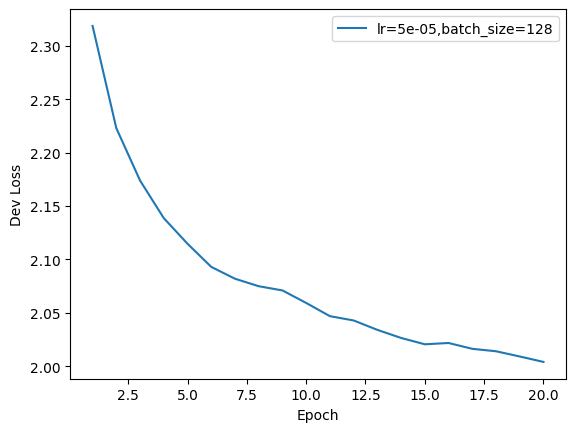

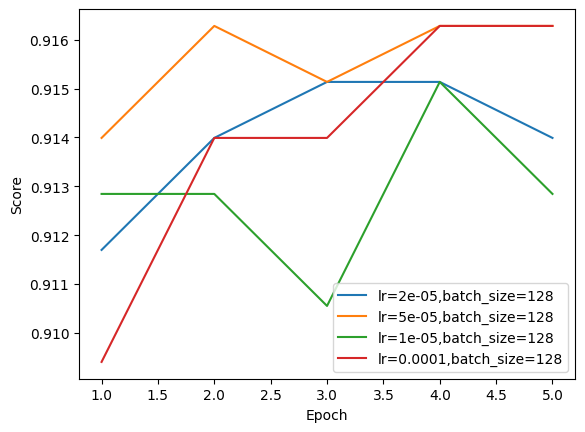

In [2]:
from process_results.results_utils import make_plots


dataset="SST-2"
plot_repeats(
    dataset,
    f"../../checkpoints/kd_finetune/{dataset}/tinybert/long_pretrain/prediction/log",
    f"../../checkpoints/kd_finetune/{dataset}/tinybert/long_pretrain/prediction/log_rp",
    plot=True
)
make_plots(f"../../checkpoints/kd_finetune/{dataset}/tinybert/long_pretrain/intermediate/log", metric="loss")
make_plots(f"../../checkpoints/kd_finetune/{dataset}/tinybert/long_pretrain/prediction/log", metric=DEFAULT_METRIC[dataset])

## Quantisation

In [6]:
from process_results.results_utils import plot_repeats
for dataset in DATASETS:
    # if dataset in ["MRPC","MNLI","QQP"]:
    #     continue
    try:
        plot_repeats(
            dataset,
            f"../../checkpoints/kd_quantize/bert_base/{dataset}/log",
            f"../../checkpoints/kd_quantize/bert_base/{dataset}/log_rp"
        )
    except IndexError:
        plot_repeats(
            dataset,
            f"../../checkpoints/kd_quantize/bert_base/{dataset}/*/log",
            f"../../checkpoints/kd_quantize/bert_base/{dataset}/log_rp"
        )

QNLI
[0.90481420464946]
\textbf{90.5} (90.5{\footnotesize±0.0})
RTE
[0.7075812274368231, 0.7075812274368231, 0.7003610108303249, 0.7075812274368231]
\textbf{70.8} (70.6{\footnotesize±0.3})
SST-2


KeyboardInterrupt: 

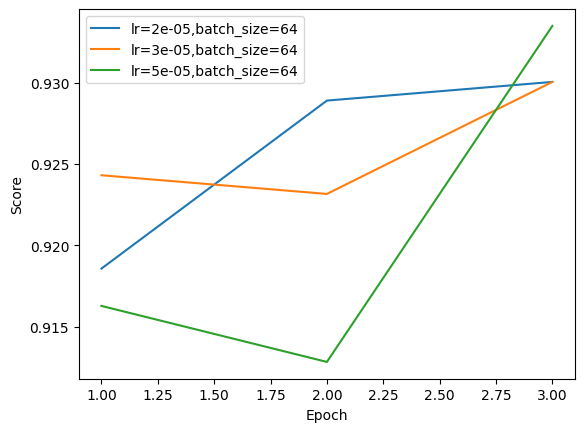

SST-2


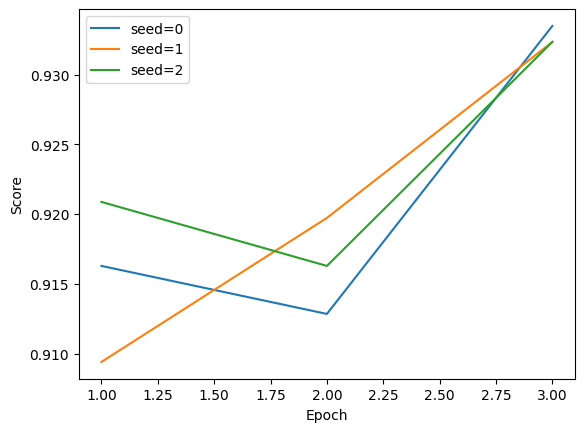

[0.9334862385321101, 0.9323394495412844, 0.9323394495412844]
\textbf{93.3} (93.3{\footnotesize±0.1})


In [3]:
dataset = "SST-2"
make_plots(f"../../checkpoints/kd_quantize/bert_base/{dataset}/log", metric=DEFAULT_METRIC[dataset])
plot_repeats(
    dataset,
    f"../../checkpoints/kd_quantize/bert_base/{dataset}/log",
    f"../../checkpoints/kd_quantize/bert_base/{dataset}/log_rp",
    plot=True,
    append_best=False
)